# Project 1 Starter

**This is draft - version 0 - changes are possible and will be anounced.**

Project 1 is to allow students to practice Data Science concepts learned so far.

The project will include following tasks:
- Load dataset. Don't use "index" column for training.
- Clean up the data:
    - Encode replace missing values
    - Replace features values that appear incorrect
- Encode categorical variables
- Split dataset to Train/Validation/Test
- Add engineered features
- Train and tune ML model
- Provide final metrics using Test dataset

### Types of models to train

Your final submission should include single model. 
The model set you should try to come up with best model:
1. Sklearn Logistic Regression - try all combinations of regularization
2. H2O-3 GLM - try different combinations of regularization



### Feature engineering

You should train/fit categorical features scalers and encoders on Train only. Use `transform` or equivalent function on Validation/Test datasets.

It is important to understand all the steps before model training, so that you can reliably replicate and test them to produce scoring function.


You should generate various new features. Examples of such features can be seen in the Module-3 lecture on GLMs.
Your final model should have at least **10** new engineered features. On-hot-encoding, label encoding, and target encoding is not included in the **10** features.
You can try, but target encoding is not expected to produce improvement for Linear models.

Ideas for Feature engineering for various types of variables:
1. https://docs.h2o.ai/driverless-ai/1-10-lts/docs/userguide/transformations.html
2. GLM lecture and hands-on (Module-3)


**Note**: 
- You don't have to perform feature engineering using H2O-3 even if you decided to use H2O-3 GLM for model training.
- It is OK to perfor feature engineering using any technique, as long as you can replicate it correctly in the Scoring function.


### Threshold calculation

You will need to calculate optimal threshold for class assignment using F1 metric:
- If using sklearn, use F1 `macro`: `f1_score(y_true, y_pred, average='macro')` 
- If using H2O-3, use F1

You will need to find optimal probability threshold for class assignment, the threshold that maximizes above F1.



### Scoring function

The Project-1 will be graded based on the completeness and performance of your final model against the hold-out dataset.
The hold-out dataset will not be known to the students. As part of your deliverables, you will need to submit a scoring function. The scoring function will perform the following:
- Accept dataset in the same format as provided with the project, minus "MIS_Status" column
- Load trained model and any encoders/scalers that are needed to transform data
- Transform dataset into format that can be scored with the trained model
- Score the dataset and return the results, for each record
    - Record ID
    - Record label as determined by final model (0 or 1)
    - If your model returns probabilities, you need to assign the label based on maximum F1 threshold
    
Scoring function header:
```
def project_1_scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return labels
    
    """
    l = data.shape[0]
    return l*[0]
```

Look for full example of scoring function at the bottom of the notebook. **Don't copy as is - this is just an example**



### Deliverables in a single zip file in the following structure:
- `notebook` (folder)
    - Jupyter notebook with complete code to manipulate data, train and tune final model. `ipynb` format
    - Jupyter notebook in `html` format
- `artifacts` (folder)
    - Model and any potential encoders in the "pkl" format or native H2O-3 format (for H2O-3 model)
    - Scoring function that will load the final model and encoders. Separate from above notebook or `.py` file



Your notebook should include explanations about your code and be designed to be easily followed and results replicated. Once you are done with the final version, you will need to test it by running all cells from top to bottom after restarting Kernel. It can be done by running `Kernel -> Restart & Run All`


**Important**: To speed up progress, first produce working code using a small subset of the dataset.

## Dataset description

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.  
More info on the original dataset: https://www.kaggle.com/mirbektoktogaraev/should-this-loan-be-approved-or-denied

**Don't use original dataset, use only dataset provided with project requirements in eLearning**

# **Importing the necessary packages**

In [83]:
#installing the necessary packages
!pip install category_encoders
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
#importing the packages
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder


In [85]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

***Describe_more Function***

In [86]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

***Load data***

In [88]:
#reading the data
data = pd.read_csv('/content/SBA_loans_project_1.csv')

In [89]:
#randomly selecting 10,000 rows from the data to generate a smaller dataset
data_sample = data.sample(n = 10000)

In [90]:
print("Data shape:", data.shape)

Data shape: (809247, 21)


In [91]:
data_v1 = data.copy() #Maintaining a copy of the original dataframe

***Review dataset***

In [9]:
#eyeballing the data
desc_df = describe_more(data)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,index,809247,int64,1,6,"{0: 1, 539491: 1, 539493: 1, 539494: 1, 539495..."
1,City,31320,object,1,30,"{'LOS ANGELES': 10372, 'HOUSTON': 9260, 'NEW Y..."
2,State,51,object,2,3,"{'CA': 117341, 'TX': 63425, 'NY': 51877, 'FL':..."
3,Zip,32731,int64,1,5,"{10001: 841, 90015: 830, 93401: 729, 90010: 65..."
4,Bank,5716,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 78111, 'WELLS F..."
5,BankState,55,object,2,3,"{'CA': 106293, 'NC': 71557, 'IL': 59258, 'OH':..."
6,NAICS,1307,int64,1,6,"{0: 181845, 722110: 25217, 722211: 17476, 8111..."
7,Term,407,int64,1,3,"{84: 207228, 60: 80965, 240: 77385, 120: 69852..."
8,NoEmp,581,int64,1,4,"{1: 138836, 2: 124470, 3: 81466, 4: 66306, 5: ..."
9,NewExist,3,float64,3,3,"{1.0: 580478, 2.0: 227709, 0.0: 932}"


In [92]:
data.head()

,index,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,240,7,1.0,6,7,1,1,0,N,"$743,000.00",$0.00,"$743,000.00","$743,000.00",P I F
1,1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,240,20,1.0,0,0,1,0,N,N,"$137,000.00",$0.00,"$137,000.00","$109,737.00",P I F
2,2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,0,120,2,1.0,0,0,1,0,0,N,"$280,000.00",$0.00,"$280,000.00","$210,000.00",P I F
3,3,WEBSTER,MA,1570,HOMETOWN BANK A CO-OPERATIVE B,MA,621310,84,7,1.0,0,0,1,1,0,Y,"$144,500.00",$0.00,"$144,500.00","$122,825.00",P I F
4,4,JOPLIN,MO,64804,U.S. BANK NATIONAL ASSOCIATION,OH,0,60,2,2.0,0,0,1,0,N,Y,"$52,500.00",$0.00,"$52,500.00","$42,000.00",P I F


# **Dataset preparation and clean-up**

***Handling missing values***


In [93]:
data.isna().sum() #checking if there are any missing values

index                   0
City                   25
State                  12
Zip                     0
Bank                 1405
BankState            1411
NAICS                   0
Term                    0
NoEmp                   0
NewExist              128
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4094
LowDoc               2319
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status           1822
dtype: int64

In [94]:
#Replacing the nulls in categorical columns with 'MISSING'
data['City'].fillna("Missing",inplace=True)
data['State'].fillna("Missing",inplace=True)
data['Bank'].fillna("Missing",inplace=True)
data['BankState'].fillna("Missing",inplace=True)
data['RevLineCr'].fillna("Missing",inplace=True)
data['LowDoc'].fillna("Missing",inplace=True)

In [95]:
data.isna().sum() #checking if there are any missing values in numerical columns
#and we can see that there are many missing values in target column

index                   0
City                    0
State                   0
Zip                     0
Bank                    0
BankState               0
NAICS                   0
Term                    0
NoEmp                   0
NewExist              128
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               0
LowDoc                  0
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status           1822
dtype: int64

In [96]:
#dropping the rows with null values in the columns NewExist and MIS_Status because the dropped rows account for approximately 1% of the data----> didn't impute with mean or median because didn't want to mislead the model
data.dropna(how='any',inplace=True)

In [97]:
data.isna().sum() #checking if there are still any missing values

index                0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [98]:
data.shape #didn't lose much of the data

(807298, 21)

***Some Data Transformations***

In [99]:
#Converting the currency columns to float
data['DisbursementGross'] = data['DisbursementGross'].str.replace("'", '').str.replace('$', '').str.replace(",", '').astype(float)
data['BalanceGross'] = data['BalanceGross'].str.replace("'", '').str.replace('$', '').str.replace(",", '').astype(float)
data['GrAppv'] = data['GrAppv'].str.replace("'", '').str.replace('$', '').str.replace(",", '').astype(float)
data['SBA_Appv'] = data['SBA_Appv'].str.replace("'", '').str.replace('$', '').str.replace(",", '').astype(float)

In [100]:
#MIS Status is in string type - we need convert it into a binary classification column - hence encoding with 1 and 0
MIS_Status_encoding = {"MIS_Status":{'P I F':0, 'CHGOFF': 1}}
data.replace(MIS_Status_encoding,inplace=True)
data['MIS_Status'] = data['MIS_Status'].astype(int)

#changing the zip into categorical column - in coming cells we will do woe encoding for this column
data['Zip'] = data['Zip'].astype(str)

In [101]:
#dropping the index column - not necessary for training
data.drop('index',inplace=True,axis=1)

In [102]:
data.head() #index column is dropped

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,240,7,1.0,6,7,1,1,0,N,743000.0,0.0,743000.0,743000.0,0
1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,240,20,1.0,0,0,1,0,N,N,137000.0,0.0,137000.0,109737.0,0
2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,0,120,2,1.0,0,0,1,0,0,N,280000.0,0.0,280000.0,210000.0,0
3,WEBSTER,MA,1570,HOMETOWN BANK A CO-OPERATIVE B,MA,621310,84,7,1.0,0,0,1,1,0,Y,144500.0,0.0,144500.0,122825.0,0
4,JOPLIN,MO,64804,U.S. BANK NATIONAL ASSOCIATION,OH,0,60,2,2.0,0,0,1,0,N,Y,52500.0,0.0,52500.0,42000.0,0


In [103]:
data.info() #checking any null values and dtypes of the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807298 entries, 0 to 809246
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               807298 non-null  object 
 1   State              807298 non-null  object 
 2   Zip                807298 non-null  object 
 3   Bank               807298 non-null  object 
 4   BankState          807298 non-null  object 
 5   NAICS              807298 non-null  int64  
 6   Term               807298 non-null  int64  
 7   NoEmp              807298 non-null  int64  
 8   NewExist           807298 non-null  float64
 9   CreateJob          807298 non-null  int64  
 10  RetainedJob        807298 non-null  int64  
 11  FranchiseCode      807298 non-null  int64  
 12  UrbanRural         807298 non-null  int64  
 13  RevLineCr          807298 non-null  object 
 14  LowDoc             807298 non-null  object 
 15  DisbursementGross  807298 non-null  float64
 16  Ba

### **Categorical and numerical variables encoding**

***splitting the dataset into train and test before performing the encoding***

In [104]:
#splitting the dataframe into features and target
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [106]:
#Splitting the data into train,validation and test
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=123)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123) # 0.25 x 0.8 = 0.2

***One hot encoding the categorical columns***

In [107]:
from sklearn.preprocessing import OneHotEncoder
ohe_columns = ['LowDoc','NewExist','UrbanRural']
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # New in version 1.2: sparse was renamed to sparse_output
X_train_ohe = ohe.fit_transform(X_train[ohe_columns])
X_val_ohe = ohe.transform(X_val[ohe_columns])
X_test_ohe = ohe.transform(X_test[ohe_columns])

cols_ohe = ohe.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=cols_ohe,index=X_train.index)
X_val_ohe = pd.DataFrame(X_val_ohe, columns=cols_ohe,index=X_val.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=cols_ohe,index=X_test.index)

X_train.drop(columns=ohe_columns,inplace=True)
X_val.drop(columns=ohe_columns,inplace=True)
X_test.drop(columns=ohe_columns,inplace=True)

X_train = pd.concat([X_train,X_train_ohe],axis=1)
X_val = pd.concat([X_val,X_val_ohe],axis=1)
X_test = pd.concat([X_test,X_test_ohe],axis=1)

In [108]:
X_test.head(3) #checking if one hot encoding was done properly

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,RevLineCr,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LowDoc_0,LowDoc_1,LowDoc_A,LowDoc_C,LowDoc_Missing,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y,NewExist_0.0,NewExist_1.0,NewExist_2.0,UrbanRural_0,UrbanRural_1,UrbanRural_2
495339,TOTOWA,NJ,7512,"PNC BANK, NATIONAL ASSOCIATION",DE,238210,93,1,1,1,1,T,43169.0,0.0,50000.0,25000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
483787,PALM SPRINGS,CA,92262,BANK OF AMERICA NATL ASSOC,NC,339999,84,2,0,2,0,T,5000.0,0.0,5000.0,2500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
82025,Brookline (town of),MA,2445,CRESCENT CU,MA,722211,84,12,22,12,48400,N,150000.0,0.0,150000.0,75000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
desc_df = describe_more(data)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,City,31304,object,1,30,"{'LOS ANGELES': 10364, 'HOUSTON': 9244, 'NEW Y..."
1,State,52,object,2,7,"{'CA': 117208, 'TX': 63372, 'NY': 51602, 'FL':..."
2,Zip,32720,object,1,5,"{'10001': 839, '90015': 830, '93401': 681, '90..."
3,Bank,5716,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 78036, 'WELLS F..."
4,BankState,56,object,2,7,"{'CA': 106216, 'NC': 71499, 'IL': 59195, 'OH':..."
5,NAICS,1307,int64,1,6,"{0: 181588, 722110: 25167, 722211: 17459, 8111..."
6,Term,407,int64,1,3,"{84: 206039, 60: 80876, 240: 77374, 120: 69821..."
7,NoEmp,580,int64,1,4,"{1: 138106, 2: 124132, 3: 81295, 4: 66179, 5: ..."
8,NewExist,3,float64,3,3,"{1.0: 579181, 2.0: 227191, 0.0: 926}"
9,CreateJob,234,int64,1,4,"{0: 564585, 1: 56622, 2: 52078, 3: 25916, 4: 1..."


***Target and weight of evidence encoding***



1. the City column has 31304 levels so doing target or woe encoding
2. the State column has 52 levels so doing target or woe encoding
3. the Zip column has 32720 levels so doing either target or woe encoding
4. the Bank column has 5716 levels so doing either target or woe encoding
5. the BankSate column has 5716 levels so doing either target or woe encoding
6. the NewExist column has 3 labels so can use one hot encoding - first   we  need to convert it into a factor variable - though it is a numerical column 1 = Existing business, 2 = New business. we can't give more importance to the new business - it's not an ordinal variable
7. the UrbanRural has 3 levels so one hot encoding - but first we need to convert it into factor variable though it is a numerical variable, 1 = Urban, 2 = rural, 0 = undefined we can't give more importance to rural - it's not an ordinal variable
8. the RevLineCr has 17 levels so target or woe encoding
9. the LowDoc has 9 levels so can use one hot encoding - LowDoc Loan Program: Y = Yes, N = No 






















In [109]:
#target encoding the categorical variables ---> not using these anywhere as te encoding is not that good with linear classifiers
tenc=ce.TargetEncoder() 
#fitting the encoding to the train dataset
tenc.fit(X_train[['City','State','Zip','Bank','BankState','RevLineCr']], y_train)
#transforming the three sets train,validation,test
X_train[['City_te','State_te','Zip_te','Bank_te','BankState_te','RevLineCr_te']] =tenc.transform(X_train[['City','State','Zip','Bank','BankState','RevLineCr']])
X_val[['City_te','State_te','Zip_te','Bank_te','BankState_te','RevLineCr_te']] =tenc.transform(X_val[['City','State','Zip','Bank','BankState','RevLineCr']])
X_test[['City_te','State_te','Zip_te','Bank_te','BankState_te','RevLineCr_te']] =tenc.transform(X_test[['City','State','Zip','Bank','BankState','RevLineCr']])

#woe encoding the categorical variables
woe_encoder = ce.woe.WOEEncoder()
#fitting the encoding to the train dataset
woe_encoder.fit(X_train[['City','State','Zip','Bank','BankState','RevLineCr']], y_train)
#transforming the three sets train,validation,test
X_train[['City_woe','State_woe','Zip_woe','Bank_woe','BankState_woe','RevLineCr_woe']] =woe_encoder.transform(X_train[['City','State','Zip','Bank','BankState','RevLineCr']])
X_val[['City_woe','State_woe','Zip_woe','Bank_woe','BankState_woe','RevLineCr_woe']] =woe_encoder.transform(X_val[['City','State','Zip','Bank','BankState','RevLineCr']])
X_test[['City_woe','State_woe','Zip_woe','Bank_woe','BankState_woe','RevLineCr_woe']] =woe_encoder.transform(X_test[['City','State','Zip','Bank','BankState','RevLineCr']])


In [110]:
#checking the shape of the train,validation and test datasets
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(484378, 43)
(161460, 43)
(161460, 43)


In [111]:
data.shape #checking the total sum of train,test,validation rows - to make sure it matches with the original dataframe rows

(807298, 20)

In [112]:
X_train.head(3) #checking how the X_train looks like

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,CreateJob,RetainedJob,FranchiseCode,RevLineCr,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LowDoc_0,LowDoc_1,LowDoc_A,LowDoc_C,LowDoc_Missing,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y,NewExist_0.0,NewExist_1.0,NewExist_2.0,UrbanRural_0,UrbanRural_1,UrbanRural_2,City_te,State_te,Zip_te,Bank_te,BankState_te,RevLineCr_te,City_woe,State_woe,Zip_woe,Bank_woe,BankState_woe,RevLineCr_woe
706133,BOCA RATON,FL,33432,"CITIBANK, N.A.",SD,453998,95,5,2,5,1,T,214166.0,0.0,50000.0,25000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.223618,0.268989,0.259852,0.189930,0.180039,0.425470,0.311218,0.548328,0.536380,0.098521,0.032056,1.247696
66048,ARLINGTON,TX,76011,FIRST NATIONAL BANK,TX,722410,195,10,0,0,1,N,85000.0,0.0,85000.0,72250.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.170984,0.189193,0.178808,0.136784,0.141072,0.146501,-0.026689,0.092827,0.051871,-0.282999,-0.258207,-0.214308
60595,MANCHESTER,NH,3101,GRANITE ST. ECONOMIC DEVEL COR,NH,322291,240,31,11,20,1,N,368000.0,0.0,384000.0,384000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.127119,0.107795,0.121019,0.000000,0.051318,0.146501,-0.369265,-0.564228,-0.390761,-5.127843,-1.363961,-0.214308


***Is OverSampling needed?***
*-yes*

In [113]:
data.groupby(by=["MIS_Status"])["MIS_Status"].count() #only 17.56% of the data has Label "1"

MIS_Status
0    665463
1    141835
Name: MIS_Status, dtype: int64

In [114]:
#preparing the feature dataset-traing with only woe encoding
pre_final_feature_cols = ['City_woe', 'State_woe', 'Zip_woe', 'Bank_woe', 'BankState_woe', 'NAICS', 'Term', 'NoEmp',
       'NewExist_0.0','NewExist_1.0','NewExist_2.0','UrbanRural_0','UrbanRural_1','UrbanRural_2','CreateJob', 'RetainedJob', 'FranchiseCode',
       'RevLineCr_woe','DisbursementGross', 'BalanceGross', 'GrAppv',
       'SBA_Appv','LowDoc_0','LowDoc_1', 'LowDoc_A', 'LowDoc_C', 'LowDoc_Missing', 'LowDoc_N',
       'LowDoc_R', 'LowDoc_S', 'LowDoc_Y']
X_train_woe = X_train[pre_final_feature_cols]
X_test_woe = X_test[pre_final_feature_cols]
X_val_woe = X_val[pre_final_feature_cols]

In [115]:
X_train_woe.head(3) #the woe encoded datat looks something like this

,City_woe,State_woe,Zip_woe,Bank_woe,BankState_woe,NAICS,Term,NoEmp,NewExist_0.0,NewExist_1.0,NewExist_2.0,UrbanRural_0,UrbanRural_1,UrbanRural_2,CreateJob,RetainedJob,FranchiseCode,RevLineCr_woe,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LowDoc_0,LowDoc_1,LowDoc_A,LowDoc_C,LowDoc_Missing,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y
706133,0.311218,0.548328,0.536380,0.098521,0.032056,453998,95,5,0.0,1.0,0.0,0.0,1.0,0.0,2,5,1,1.247696,214166.0,0.0,50000.0,25000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
66048,-0.026689,0.092827,0.051871,-0.282999,-0.258207,722410,195,10,0.0,0.0,1.0,0.0,1.0,0.0,0,0,1,-0.214308,85000.0,0.0,85000.0,72250.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
60595,-0.369265,-0.564228,-0.390761,-5.127843,-1.363961,322291,240,31,0.0,1.0,0.0,0.0,1.0,0.0,11,20,1,-0.214308,368000.0,0.0,384000.0,384000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [116]:
X_val_woe.head(3)

,City_woe,State_woe,Zip_woe,Bank_woe,BankState_woe,NAICS,Term,NoEmp,NewExist_0.0,NewExist_1.0,NewExist_2.0,UrbanRural_0,UrbanRural_1,UrbanRural_2,CreateJob,RetainedJob,FranchiseCode,RevLineCr_woe,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LowDoc_0,LowDoc_1,LowDoc_A,LowDoc_C,LowDoc_Missing,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y
12800,0.161686,-0.506143,0.161686,0.580310,0.667699,115116,12,1,0.0,1.0,0.0,1.0,0.0,0.0,0,0,1,-0.185511,10000.0,0.0,10000.0,5000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
668517,0.854834,-0.372034,0.631690,-0.362361,-1.115791,453220,120,5,0.0,1.0,0.0,0.0,1.0,0.0,0,0,1,-0.185511,110000.0,0.0,110000.0,93500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
497069,-0.048718,-0.279780,2.910559,-0.254481,0.032056,0,8,14,0.0,1.0,0.0,0.0,1.0,0.0,0,14,1,0.463732,148979.0,0.0,150000.0,75000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [117]:
X_test_woe.head(3)

,City_woe,State_woe,Zip_woe,Bank_woe,BankState_woe,NAICS,Term,NoEmp,NewExist_0.0,NewExist_1.0,NewExist_2.0,UrbanRural_0,UrbanRural_1,UrbanRural_2,CreateJob,RetainedJob,FranchiseCode,RevLineCr_woe,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LowDoc_0,LowDoc_1,LowDoc_A,LowDoc_C,LowDoc_Missing,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y
495339,0.161686,0.162736,0.161686,0.122847,0.452401,238210,93,1,0.0,1.0,0.0,0.0,1.0,0.0,1,1,1,1.247696,43169.0,0.0,50000.0,25000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
483787,-0.278870,0.072970,0.007536,0.580310,0.667699,339999,84,2,0.0,0.0,1.0,0.0,1.0,0.0,0,2,0,1.247696,5000.0,0.0,5000.0,2500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
82025,-0.061457,-0.372034,-0.397929,0.000000,-1.115791,722211,84,12,0.0,1.0,0.0,0.0,1.0,0.0,22,12,48400,-0.214308,150000.0,0.0,150000.0,75000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


***Combining the X_train, y_train datasets and the same with val and test because it will be easy when working with h2o***

In [118]:
#to combine the dataframes in next cell ---> changing the "y" pandas series into pandas dataframe
y_train_df = pd.DataFrame(y_train, columns = ['MIS_Status'])
y_val_df = pd.DataFrame(y_val, columns = ['MIS_Status'])
y_test_df = pd.DataFrame(y_test, columns = ['MIS_Status'])


In [119]:
#concating the dataframes to convert them into  H2o frames
train_df = pd.concat([X_train_woe, y_train_df], axis=1)
valid_df = pd.concat([X_val_woe, y_val_df], axis=1)
test_df = pd.concat([X_test_woe, y_test_df], axis=1)

In [120]:
train_df.head(3) #checking if the cocatenation worked

,City_woe,State_woe,Zip_woe,Bank_woe,BankState_woe,NAICS,Term,NoEmp,NewExist_0.0,NewExist_1.0,NewExist_2.0,UrbanRural_0,UrbanRural_1,UrbanRural_2,CreateJob,RetainedJob,FranchiseCode,RevLineCr_woe,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LowDoc_0,LowDoc_1,LowDoc_A,LowDoc_C,LowDoc_Missing,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y,MIS_Status
706133,0.311218,0.548328,0.536380,0.098521,0.032056,453998,95,5,0.0,1.0,0.0,0.0,1.0,0.0,2,5,1,1.247696,214166.0,0.0,50000.0,25000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
66048,-0.026689,0.092827,0.051871,-0.282999,-0.258207,722410,195,10,0.0,0.0,1.0,0.0,1.0,0.0,0,0,1,-0.214308,85000.0,0.0,85000.0,72250.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
60595,-0.369265,-0.564228,-0.390761,-5.127843,-1.363961,322291,240,31,0.0,1.0,0.0,0.0,1.0,0.0,11,20,1,-0.214308,368000.0,0.0,384000.0,384000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


# **Model Training and Hyper Parameter Tuning -with H2o GeneralizedLinear Model (GLM)** 

*The reason for picking the glm model is it's easy to tune than logistc regression. GLM has an option called lambda search where it autotunes itself without the need for us to provide a range of values for lambda in hyper parameters. It gives large number of metrics for the best model after the model is tuned.It automatically gives us the max F1 for the best model probability threshold and it also has many number of menthods like variable importance....etc*

In [121]:
#importing h2o and intializing the cluster
import h2o

h2o.init(max_mem_size = "14G")             #specify max number of bytes. uses all cores by default.
h2o.remove_all()   

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 54 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_unknownUser_q2c3pf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,13.83 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [122]:
#importing the Generalized linear model from H2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [123]:
#setting up a variable col_list which stores the column names ---> to be used while creating the H2o frame
col_list = list(train_df.columns)

In [124]:
#converting the pandas dataframes into h2o frames
train_h2o = h2o.H2OFrame(train_df,column_names = col_list)
valid_h2o = h2o.H2OFrame(valid_df,column_names = col_list)
test_h2o = h2o.H2OFrame(test_df,column_names = col_list)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [125]:
train_h2o.head(3) #checking out the h2o frame

City_woe,State_woe,Zip_woe,Bank_woe,BankState_woe,NAICS,Term,NoEmp,NewExist_0.0,NewExist_1.0,NewExist_2.0,UrbanRural_0,UrbanRural_1,UrbanRural_2,CreateJob,RetainedJob,FranchiseCode,RevLineCr_woe,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LowDoc_0,LowDoc_1,LowDoc_A,LowDoc_C,LowDoc_Missing,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y,MIS_Status
0.311218,0.548328,0.53638,0.0985208,0.032056,453998,95,5,0,1,0,0,1,0,2,5,1,1.2477,214166,0,50000,25000,0,0,0,0,0,1,0,0,0,0
-0.0266889,0.0928273,0.0518715,-0.282999,-0.258207,722410,195,10,0,0,1,0,1,0,0,0,1,-0.214308,85000,0,85000,72250,0,0,0,0,0,1,0,0,0,1
-0.369265,-0.564228,-0.390761,-5.12784,-1.36396,322291,240,31,0,1,0,0,1,0,11,20,1,-0.214308,368000,0,384000,384000,0,0,0,0,0,1,0,0,0,0


In [126]:
#Prepare predictors and response columns
predictors = train_h2o.col_names[:-1]     #last column is whethere loan is paid or charged off
response = train_h2o.col_names[-1]    

In [127]:
## For binary classification, response should be a factor

train_h2o[response] = train_h2o[response].asfactor()
valid_h2o[response] = valid_h2o[response].asfactor()
test_h2o[response] = test_h2o[response].asfactor()

##NEW Exist and UrbanRural are categorical columns ---->hence converting them to factor


***Adding Engineered features***


In [128]:
def cut_column(train_df, train, valid, test, col,n_bins):
    '''
    Convenience function to change a column from numerical to categorical
    We use train_df only for bucketing with histograms.
    Uses np.histogram to generate a histogram, with the buckets forming the categories of our new categorical.
    Picks buckets based on training data, then applies the same classification to the test and validation sets
    
    Assumes that train, valid, test will have the same histogram behavior.
    '''
    only_col= train_df[col]                            #Isolate the column in question from the training frame
    counts, breaks = np.histogram(only_col, bins=n_bins)   #Generate counts and breaks for our histogram
    min_val = min(only_col)-1                          #Establish min and max values
    max_val = max(only_col)+1
    
    new_b = [min_val]                                  #Redefine breaks such that each bucket has enough support
    for i in range(n_bins-1):
        if counts[i] > 1000 and counts[i+1] > 1000:
            new_b.append(breaks[i+1])
    new_b.append(max_val)
    
    names = [col + '_' + str(x) for x in range(len(new_b)-1)]  #Generate names for buckets, these will be categorical names

    train[col+"_cut"] = train[col].cut(breaks=new_b, labels=names)
    valid[col+"_cut"] = valid[col].cut(breaks=new_b, labels=names)
    test[col+"_cut"] = test[col].cut(breaks=new_b, labels=names)

In [129]:
def add_features(train, valid, test):
    '''
    Helper function to add a specific set of features to our covertype dataset
    '''
    #pull train dataset into Python
    train_df = train.as_data_frame(True)
    
    #getting the first two digits of NAICS code - which define the industries.
    train['NAICS_sector'] = train['NAICS'] // 10000
    valid['NAICS_sector'] = valid['NAICS'] // 10000
    test['NAICS_sector'] = test['NAICS'] // 10000

    #Make categoricals for several columns

    cut_column(train_df, train, valid, test, "Term",50)
    cut_column(train_df, train, valid, test, "NoEmp",10)
    cut_column(train_df, train, valid, test, "CreateJob",10)
    cut_column(train_df, train, valid, test, "RetainedJob",10)
    cut_column(train_df, train, valid, test, "DisbursementGross",100)
    cut_column(train_df, train, valid, test, "GrAppv",100)
    cut_column(train_df, train, valid, test, "SBA_Appv",100)
    
    
    #Add interaction columns for a subset of columns
    interaction_cols1 = [
                         "Term_cut",
                         "NoEmp_cut",
                         "CreateJob_cut",
                         "RetainedJob_cut",
                         "DisbursementGross_cut"
                   ]

    train_cols = train.interaction(factors=interaction_cols1,    #Generate pairwise columns
                                   pairwise=True,
                                   max_factors=1000,
                                   min_occurrence=100,
                                   destination_frame="itrain")
    valid_cols = valid.interaction(factors=interaction_cols1,
                                   pairwise=True,
                                   max_factors=1000,
                                   min_occurrence=100,
                                   destination_frame="ivalid")
    test_cols = test.interaction(factors=interaction_cols1,
                                   pairwise=True,
                                   max_factors=1000,
                                   min_occurrence=100,
                                   destination_frame="itest")
    
    train = train.cbind(train_cols)                              #Append pairwise columns to H2OFrames
    valid = valid.cbind(valid_cols)
    test = test.cbind(test_cols)
    
    

    
    return train, valid, test

In [130]:
#adding engineered features to the dataset ---> train_h2o_v1,valid_h2o_v1,test_h2o_v1 are the final datasets to be trained
import numpy as np
train_h2o_v1, valid_h2o_v1, test_h2o_v1 = add_features(train_h2o,valid_h2o,test_h2o)
#totally 17 engineered features are added

Interactions progress: |█████████████████████████████████████████████████████████| (done) 100%
Interactions progress: |█████████████████████████████████████████████████████████| (done) 100%
Interactions progress: |█████████████████████████████████████████████████████████| (done) 100%


In [131]:
train_h2o_v1.head(3) #checking out the train H2o frame after adding the features

City_woe,State_woe,Zip_woe,Bank_woe,BankState_woe,NAICS,Term,NoEmp,NewExist_0.0,NewExist_1.0,NewExist_2.0,UrbanRural_0,UrbanRural_1,UrbanRural_2,CreateJob,RetainedJob,FranchiseCode,RevLineCr_woe,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,LowDoc_0,LowDoc_1,LowDoc_A,LowDoc_C,LowDoc_Missing,LowDoc_N,LowDoc_R,LowDoc_S,LowDoc_Y,MIS_Status,NAICS_sector,Term_cut,NoEmp_cut,CreateJob_cut,RetainedJob_cut,DisbursementGross_cut,GrAppv_cut,SBA_Appv_cut,Term_cut_NoEmp_cut,Term_cut_CreateJob_cut,Term_cut_RetainedJob_cut,Term_cut_DisbursementGross_cut,NoEmp_cut_CreateJob_cut,NoEmp_cut_RetainedJob_cut,NoEmp_cut_DisbursementGross_cut,CreateJob_cut_RetainedJob_cut,CreateJob_cut_DisbursementGross_cut,RetainedJob_cut_DisbursementGross_cut
0.311218,0.548328,0.53638,0.0985208,0.032056,453998,95,5,0,1,0,0,1,0,2,5,1,1.2477,214166,0,50000,25000,0,0,0,0,0,1,0,0,0,0,45,Term_8,NoEmp_0,CreateJob_0,RetainedJob_0,DisbursementGross_1,GrAppv_0,SBA_Appv_0,Term_8_NoEmp_0,Term_8_CreateJob_0,Term_8_RetainedJob_0,Term_8_DisbursementGross_1,NoEmp_0_CreateJob_0,NoEmp_0_RetainedJob_0,NoEmp_0_DisbursementGross_1,CreateJob_0_RetainedJob_0,CreateJob_0_DisbursementGross_1,RetainedJob_0_DisbursementGross_1
-0.0266889,0.0928273,0.0518715,-0.282999,-0.258207,722410,195,10,0,0,1,0,1,0,0,0,1,-0.214308,85000,0,85000,72250,0,0,0,0,0,1,0,0,0,1,72,Term_17,NoEmp_0,CreateJob_0,RetainedJob_0,DisbursementGross_0,GrAppv_1,SBA_Appv_1,Term_17_NoEmp_0,Term_17_CreateJob_0,Term_17_RetainedJob_0,Term_17_DisbursementGross_0,NoEmp_0_CreateJob_0,NoEmp_0_RetainedJob_0,NoEmp_0_DisbursementGross_0,CreateJob_0_RetainedJob_0,CreateJob_0_DisbursementGross_0,RetainedJob_0_DisbursementGross_0
-0.369265,-0.564228,-0.390761,-5.12784,-1.36396,322291,240,31,0,1,0,0,1,0,11,20,1,-0.214308,368000,0,384000,384000,0,0,0,0,0,1,0,0,0,0,32,Term_19,NoEmp_0,CreateJob_0,RetainedJob_0,DisbursementGross_3,GrAppv_7,SBA_Appv_7,Term_19_NoEmp_0,Term_19_CreateJob_0,Term_19_RetainedJob_0,Term_19_DisbursementGross_3,NoEmp_0_CreateJob_0,NoEmp_0_RetainedJob_0,NoEmp_0_DisbursementGross_3,CreateJob_0_RetainedJob_0,CreateJob_0_DisbursementGross_3,RetainedJob_0_DisbursementGross_3


## Model Tuning

Choose one model from the above list. You should provide reasoning on why you have picked the model over others. Perform tuning for the selected model:
- Hyper-parameter tuning. Your hyper-parameter search space should have at least 50 combinations.
- To avoid overfitting and provide you with reasonable estimate of model performance on hold-out dataset, you will need to split your dataset as following:
    - Train, will be used to train model
    - Validation, will be used to validate model each round of training
    - Testing, will be used to provide final performance metrics, used only once on the final model
- Feature engineering. See project description

**Selelct final model that produces best performance on the Test dataset.**
- For the best model, calculate probability threshold to maximize F1. 

In [132]:
#importing the grid search package from h2o.grid
from h2o.grid import H2OGridSearch

In [169]:
# GLM hyperparameters
#[x*0.1 for x in range(0, 10)]
glm_hyper_params = {"alpha": [x*0.02 for x in range(0, 50)]} #tried 50 hyperparameters 
# this example uses cartesian grid search because the search space is small
# and we want to see the performance of all models. For a larger search space use
# random grid search instead: {'strategy': "RandomDiscrete"}

# initialize the glm estimator
model = H2OGeneralizedLinearEstimator(family = 'binomial',seed=123,standardize = True,lambda_search=True)

#search criteria
rand_search_criteria = {
        "strategy":"Cartesian"}

# build grid search with previously made GLM and hyperparameters
grid = H2OGridSearch(model = model, hyper_params = glm_hyper_params,search_criteria = rand_search_criteria)

# train using the grid
%time grid.train(x = predictors, y = response, training_frame = train_h2o_v1, validation_frame = valid_h2o_v1)

# sort the grid models by decreasing AUC
grid_table = grid.get_grid(sort_by = 'auc', decreasing = True)
print(grid_table)

best_model = grid_table.models[0]

glm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
CPU times: user 20.3 s, sys: 2.24 s, total: 22.5 s
Wall time: 42min 8s
Hyper-Parameter Search Summary: ordered by decreasing auc
     alpha               model_ids                                                        auc
---  ------------------  ---------------------------------------------------------------  ------------------
     0.68                Grid_GLM_py_63_sid_92fd_model_python_1680444677777_389_model_35  0.8414700784278331
     0.6                 Grid_GLM_py_63_sid_92fd_model_python_1680444677777_389_model_31  0.841469162803179
     0.66                Grid_GLM_py_63_sid_92fd_model_python_1680444677777_389_model_34  0.8414650238369595
     0.64                Grid_GLM_py_63_sid_92fd_model_python_1680444677777_389_model_33  0.8414359101371027
     0.62                Grid_GLM_py_63_sid_92fd_model_python_1680444677777_389_model_32  0.8414082332230602
     0.58                Grid

***All the accuracy metrics of the best model***

In [171]:
best_model

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: Grid_GLM_py_63_sid_92fd_model_python_1680444677777_389_model_35


GLM Model: summary
    family    link    regularization                                  lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------------------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.68, lambda = 4.557E-4 )  nlambda = 100, lambda.max = 0.1756, lambda.min = 4.557E-4, lambda.1se = -1.0  31                            22                             98                      py_63_sid_92fd

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.09591486636361768
RMSE: 0.3097012534098267
LogLoss: 0.32449698102914565
AUC: 0.8674408384151115
AUCPR: 0.6368988245582455
Gini: 0.7348816768302231
Null degrees of freedom: 484377
Residual degrees of freedom: 484355
Null deviance: 449801.25059945346
Residual deviance: 314358.3973532138
AIC: 314404.3973532138

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3339493503509247
       0       1      Error    Rate
-----  ------  -----  -------  ------------------
0      363306  36124  0.0904   (36124.0/399430.0)
1      30716   54232  0.3616   (30716.0/84948.0)
Total  394022  90356  0.138    (66840.0/484378.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.333949     0.618719  195
max f2                       0.192059     0.688691  264
max f0point5                 0.452332     0.647545  145
max accuracy                 0.446859     0.874288  147
max precision                0.796927     0.857332  35
max recall                   0.000131352  1         399
max specificity              0.994463     0.999945  0
max absolute_mcc             0.359607     0.535628  184
max min_per_class_accuracy   0.209203     0.79271   255
max mean_per_class_accuracy  0.228249     0.794175  245
max tns                      0.994463     399408    0
max fns                      0.994463     84933     0
max fps                      0.000131352  399430    399
max tps                      0.000131352  84948     399
max tnr                      0.994463     0.999945  0
max fnr                      0.994463     0.999823  0
max fpr                      0.000131352  1         399
max tpr                      0.000131352  1         399

Gains/Lift Table: Avg response rate: 17.54 %, avg score: 17.54 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100005                   0.823881           4.85098    4.85098            0.850743         0.878271     0.850743                    0.878271            0.048512        0.048512                   385.098   385.098            0.046702
2        0.0200009                   0.757434           4.84627    4.84863            0.849917         0.788877     0.85033                     0.833574            0.0484649       0.096977                   384.627   384.863            0.0933468
3        0.0300014                   0.707155           4.73327    4.81018            0.830099         0.731135     0.843587                

# **best_model metrics for validation data**

***Probability threshold for max F1***

In [172]:
best_model.find_threshold_by_max_metric("f1",valid=True,train=True)

{'train': 0.3339493503509247, 'valid': 0.30017024113515917}

***F1 score using the above probability thresholds***

In [174]:
best_model.F1(valid=True)

[[0.30017024113515917, 0.5745221911235505]]

***AUC***

In [194]:
best_model.model_performance(valid=True).auc()

0.8414700784278331

***AUCPR***

In [176]:
best_model.model_performance(valid=True).aucpr()

0.5730050696954886

# **best_model metrics for test data**

***predictions***

In [177]:
###: Performing predictions with one of the above model
glm_predictions = best_model.predict(test_h2o_v1)
glm_predictions


glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict,p0,p1
0,0.890223,0.109777
0,0.830022,0.169978
0,0.876069,0.123931
1,0.53131,0.46869
0,0.999466,0.00053376
0,0.9698,0.0301999
0,0.952512,0.0474879
0,0.997383,0.00261693
1,0.165472,0.834528
0,0.970501,0.0294993


***AUC***

In [180]:
# set the 'predicted' and 'actuals':
actual = test_h2o_v1["MIS_Status"]
pred = best_model.predict(test_h2o_v1)[2]

# retrieve the model metrics:
metrics = h2o.make_metrics(pred, actual)
metrics.auc()

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


0.8429465532645333

***AUCPR***

In [183]:
metrics.aucpr()

0.5791438420594932

***confusion matrix***

In [184]:
metrics.confusion_matrix()

,0,1,Error,Rate
0,118219.0,14884.0,0.1118,(14884.0/133103.0)
1,10854.0,17503.0,0.3828,(10854.0/28357.0)
Total,129073.0,32387.0,0.1594,(25738.0/161460.0)


***F1***

In [198]:
validation_threshold_for_max_f1 = 0.30017024113515917
metrics.F1(thresholds=[validation_threshold_for_max_f1])[0][1]

Could not find exact threshold 0.30017024113515917; using closest threshold found 0.30090516703990955.


0.5758728521228924

***Understanding/Validating predictions based on prediction results historgram***

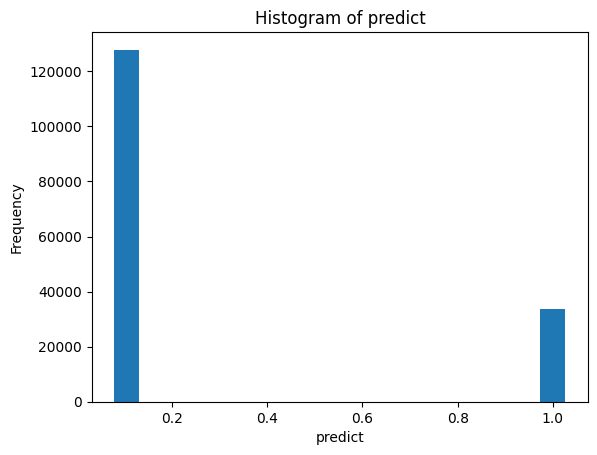

breaks,counts,mids_true,mids,widths
0.0526316,nan,nan,nan,nan
0.105263,127830,0,0.0789474,0.0526316
0.157895,0,0,0.131579,0.0526316
0.210526,0,0,0.184211,0.0526316
0.263158,0,0,0.236842,0.0526316
0.315789,0,0,0.289474,0.0526316
0.368421,0,0,0.342105,0.0526316
0.421053,0,0,0.394737,0.0526316
0.473684,0,0,0.447368,0.0526316
0.526316,0,0,0.5,0.0526316


In [192]:

glm_predictions['predict'].asnumeric().hist()


***Getting model variable importance PLOT***

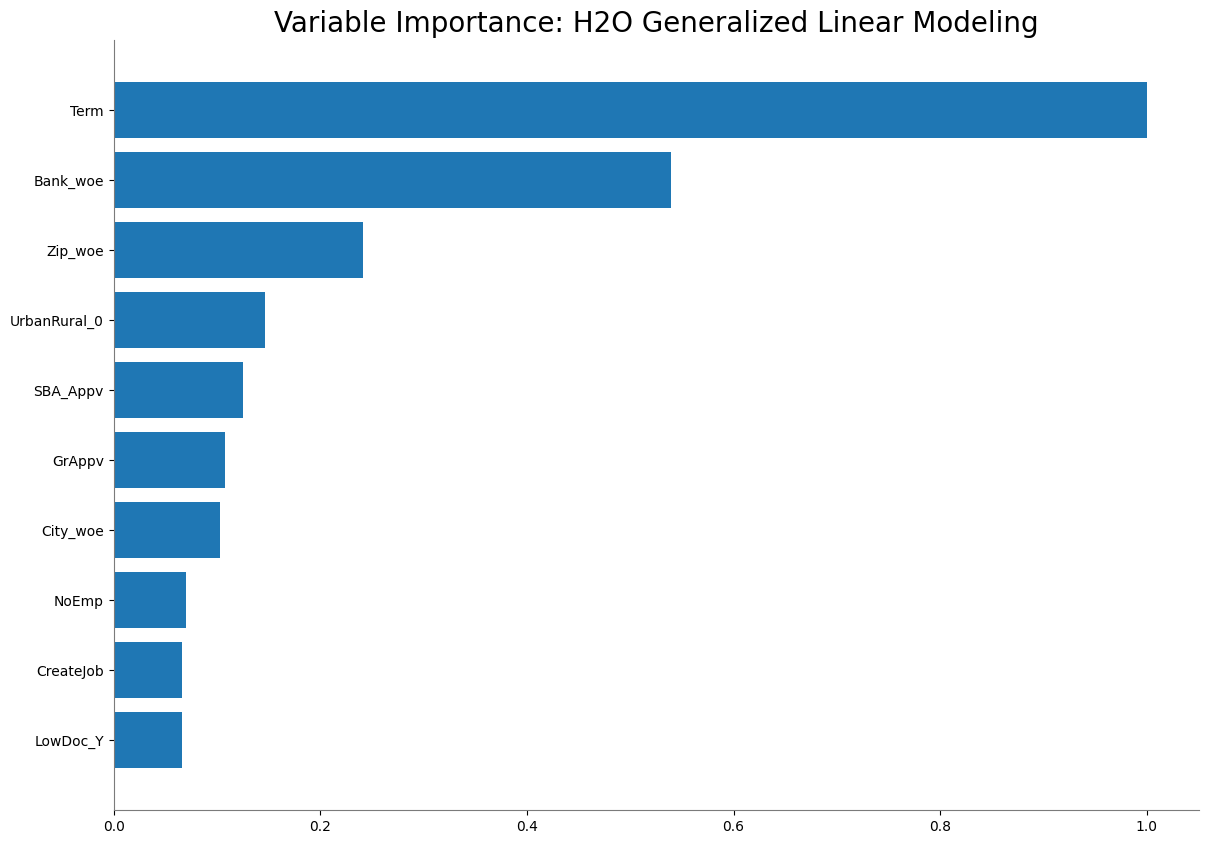

<Figure size 640x480 with 0 Axes>

In [191]:

best_model.varimp_plot()